In [1]:
import librosa
import numpy as np


In [2]:
# Load the audio file
AUDIO_FILE = 'SnoringDataset/0/0_0.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [3]:
print(sample_rate)

44100


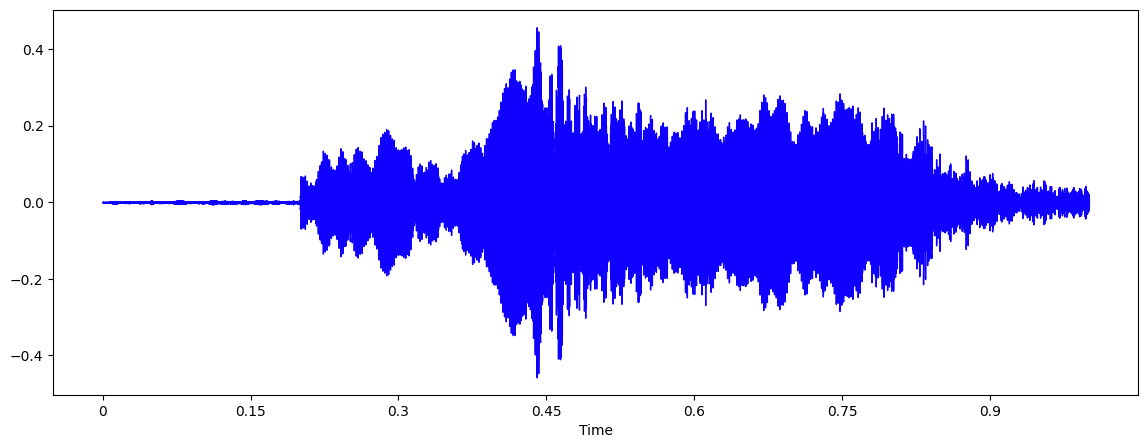

In [4]:
import librosa
from  librosa.display import waveshow
import matplotlib.pyplot as plt

# Load an audio file

plt.figure(figsize=(14, 5))
# Display the waveform
waveshow(samples, sr=sample_rate,color='#0f00ff')


In [5]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [6]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (44100,) Sample rate  44100 Data type <class 'numpy.ndarray'>
[-0.15176392 -0.11154175 -0.05300903  0.01486206  0.07177734  0.12179565
  0.17010498  0.20474243  0.21511841  0.19891357  0.16680908  0.13909912
  0.11352539  0.07363892  0.03463745  0.01568604 -0.00576782 -0.04754639
 -0.08630371 -0.11102295]


/tmp/ipykernel_9040/2304845838.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


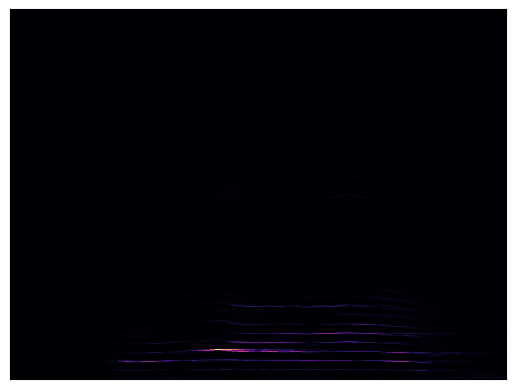

In [7]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

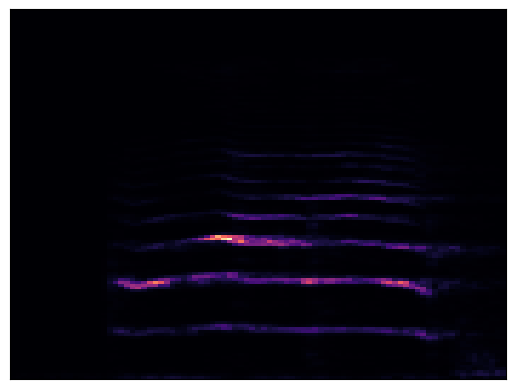

In [8]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

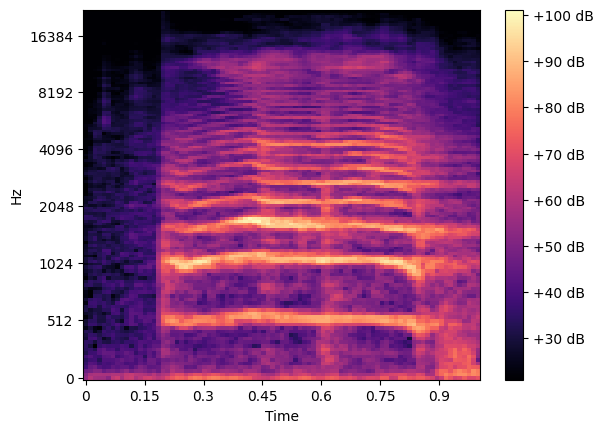

In [9]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [10]:
#Spectrogram is a 2D numpy array
print(type(mel_sgram), mel_sgram.shape)
# <class 'numpy.ndarray'> (128, 134)

<class 'numpy.ndarray'> (128, 87)


/home/ishaquenizamani/anaconda3/envs/snoring/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/ishaquenizamani/anaconda3/envs/snoring/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


MFCC is of type <class 'numpy.ndarray'> with shape (20, 87)


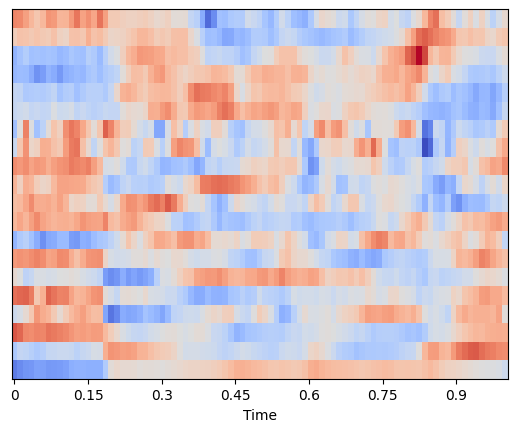

In [15]:
from sklearn.preprocessing  import scale
import librosa
import librosa.display
from librosa.feature.spectral import mfcc
# Load the audio file
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
mfcc1 = mfcc(y=samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc1 = scale(mfcc1, axis=1)
librosa.display.specshow(mfcc1, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc1)} with shape {mfcc1.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)